In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [30]:
# ======== 1. Đọc và xử lý dữ liệu ========
df = pd.read_csv("Gold_Futures_Cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

data = df[['Date', 'Price']].copy()

# Chia 80% train, 20% test theo thời gian (lùi 60 bước cho test)
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index - 60:]

# Chuẩn hóa
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[['Price']])
scaled_test = scaler.transform(test_data[['Price']])

# Tạo chuỗi thời gian
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Ngày tương ứng để vẽ
train_dates = train_data['Date'].iloc[seq_length:].reset_index(drop=True)
test_dates = test_data['Date'].iloc[seq_length:].reset_index(drop=True)

In [31]:
# ======== 2. Xây dựng mô hình GRU ========
model = Sequential()
model.add(GRU(64, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Thêm Dropout để giảm overfit
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\admin\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# ======== 3. Callbacks để giảm overfit ========
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

In [33]:
# ======== 4. Huấn luyện mô hình ========
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0350
Epoch 1: val_loss improved from inf to 0.00091, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0348 - val_loss: 9.1228e-04 - learning_rate: 0.0010
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016
Epoch 2: val_loss improved from 0.00091 to 0.00089, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0016 - val_loss: 8.8872e-04 - learning_rate: 0.0010
Epoch 3/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0014
Epoch 3: val_loss did not improve from 0.00089
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0014 - val_loss: 8.9397e-04 - learning_rate: 0.0010
Epoch 4/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012
Epoch 4: val_loss did not improve from 0.00089
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 5/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3448e-04
Epoch 5: val_loss improved from 0.00089 to 0.00083, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9.3551e-04 - val_loss: 8.2964e-04 - learning_rate: 0.0010
Epoch 6/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.8098e-04
Epoch 6: val_loss improved from 0.00083 to 0.00083, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.8249e-04 - val_loss: 8.2608e-04 - learning_rate: 0.0010
Epoch 7/50
74/77 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6555e-04
Epoch 7: val_loss improved from 0.00083 to 0.00070, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.6658e-04 - val_loss: 7.0402e-04 - learning_rate: 0.0010
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.0703e-04
Epoch 8: val_loss improved from 0.00070 to 0.00059, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.0709e-04 - val_loss: 5.8994e-04 - learning_rate: 0.0010
Epoch 9/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9214e-04
Epoch 9: val_loss did not improve from 0.00059
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.9190e-04 - val_loss: 6.1328e-04 - learning_rate: 0.0010
Epoch 10/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3913e-04
Epoch 10: val_loss improved from 0.00059 to 0.00057, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4071e-04 - val_loss: 5.7182e-04 - learning_rate: 0.0010
Epoch 11/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3163e-04
Epoch 11: val_loss did not improve from 0.00057
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.3227e-04 - val_loss: 6.4671e-04 - learning_rate: 0.0010
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4711e-04
Epoch 12: val_loss did not improve from 0.00057
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.4709e-04 - val_loss: 7.8168e-04 - learning_rate: 0.0010
Epoch 13/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.0762e-04
Epoch 13: val_loss did not improve from 0.00057
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.0852e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.1851e-04
Epoch 14: val_loss improved from 0.00057 to 0.00053, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.1800e-04 - val_loss: 5.2534e-04 - learning_rate: 0.0010
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.3673e-04
Epoch 15: val_loss did not improve from 0.00053
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 7.3619e-04 - val_loss: 6.3381e-04 - learning_rate: 0.0010
Epoch 16/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3081e-04
Epoch 16: val_loss improved from 0.00053 to 0.00050, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.3186e-04 - val_loss: 4.9852e-04 - learning_rate: 0.0010
Epoch 17/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.0866e-04
Epoch 17: val_loss did not improve from 0.00050
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.0917e-04 - val_loss: 6.1763e-04 - learning_rate: 0.0010
Epoch 18/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.5735e-04
Epoch 18: val_loss did not improve from 0.00050

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.5670e-04 - val_loss: 6.1314e-04 - learning_rate: 0.0010
Epoch 19/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.2398e-04
Epoch 19: val_loss did not improve from 0.00050
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2466e-04 - val_loss: 6.5793e-04 - learning_rate: 5.0000e-04
Epoch 20/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.6384e-04
Epoch 20: val_loss improved from 0.00050 to 0.00047, saving model 

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.6508e-04 - val_loss: 4.6577e-04 - learning_rate: 5.0000e-04
Epoch 21/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.2307e-04
Epoch 21: val_loss did not improve from 0.00047
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.2293e-04 - val_loss: 6.1782e-04 - learning_rate: 5.0000e-04
Epoch 22/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7809e-04
Epoch 22: val_loss did not improve from 0.00047
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.7833e-04 - val_loss: 4.8714e-04 - learning_rate: 5.0000e-04
Epoch 23/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1585e-04
Epoch 23: val_loss did not improve from 0.00047
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.1510e-04 - val_loss: 5.0611e-04 - learning_rate: 5.0000e-04
Epoch 24/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0815e-04
Epoch 24: val_loss did not improve from 0.00047
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0903e-04 - val_loss: 7.3436e-04 - 

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.8171e-04 - val_loss: 4.5112e-04 - learning_rate: 5.0000e-04
Epoch 26/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.5540e-04
Epoch 26: val_loss did not improve from 0.00045
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5456e-04 - val_loss: 6.4139e-04 - learning_rate: 5.0000e-04
Epoch 27/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9371e-04
Epoch 27: val_loss improved from 0.00045 to 0.00044, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.9527e-04 - val_loss: 4.3812e-04 - learning_rate: 5.0000e-04
Epoch 28/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0729e-04
Epoch 28: val_loss did not improve from 0.00044
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0801e-04 - val_loss: 7.0839e-04 - learning_rate: 5.0000e-04
Epoch 29/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5517e-04
Epoch 29: val_loss improved from 0.00044 to 0.00043, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.5471e-04 - val_loss: 4.3290e-04 - learning_rate: 5.0000e-04
Epoch 30/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8143e-04
Epoch 30: val_loss did not improve from 0.00043

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.8106e-04 - val_loss: 4.3791e-04 - learning_rate: 5.0000e-04
Epoch 31/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2991e-04
Epoch 31: val_loss did not improve from 0.00043
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.2981e-04 - val_loss: 4.6323e-04 - learning_rate: 2.5000e-04
Epoch 32/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2383e-04
Epoch 32: val_loss did not improve from 0.00043
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.2399e-04 - val_loss: 4.7029e-04 - learning_rate: 2.5000e-04
Epoch 33/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.9153e-04
Epoch 33: val_loss did not improve from 0.00043
77/77 

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.9827e-04 - val_loss: 4.2835e-04 - learning_rate: 2.5000e-04
Epoch 37/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4914e-04
Epoch 37: val_loss did not improve from 0.00043
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4963e-04 - val_loss: 4.3872e-04 - learning_rate: 2.5000e-04
Epoch 38/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9584e-04
Epoch 38: val_loss improved from 0.00043 to 0.00043, saving model to best_model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.9690e-04 - val_loss: 4.2753e-04 - learning_rate: 2.5000e-04
Epoch 39/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.1106e-04
Epoch 39: val_loss did not improve from 0.00043
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.1063e-04 - val_loss: 4.9385e-04 - learning_rate: 2.5000e-04
Epoch 40/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.8946e-04
Epoch 40: val_loss did not improve from 0.00043

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.9047e-04 - val_loss: 4.3397e-04 - learning_rate: 2.5000e-04
Epoch 41/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.2904e-04
Epoch 41: val_loss did not improve from 0.00043
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2955e-04 - val_loss: 5.1425e-04 - learning_rate: 1.2500e-04
Epoch 42/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.3094e-04
Epoch 42: val_loss did not improve from 0.00043
77/77 

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.0111e-04 - val_loss: 4.2312e-04 - learning_rate: 1.2500e-04
Epoch 46/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.2015e-04
Epoch 46: val_loss did not improve from 0.00042
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.1968e-04 - val_loss: 6.0973e-04 - learning_rate: 1.2500e-04
Epoch 47/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.1476e-04
Epoch 47: val_loss did not improve from 0.00042
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.1450e-04 - val_loss: 4.7510e-04 - learning_rate: 1.2500e-04
Epoch 48/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.4217e-04
Epoch 48: val_loss did not improve from 0.00042
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.4109e-04 - val_loss: 4.2379e-04 - learning_rate: 1.2500e-04
Epoch 49/50
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5624e-04
Epoch 49: val_loss did not improve from 0.00042
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5586e-04 - val_loss: 4.2393e-04 - 


Epoch 50: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.4581e-04 - val_loss: 4.1874e-04 - learning_rate: 1.2500e-04
Restoring model weights from the end of the best epoch: 50.


In [34]:
# ======== 5. Dự đoán ========
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
train_inv = scaler.inverse_transform(y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [35]:
# ======== 6. Đánh giá ========
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 30.264763804078864
MAPE: 1.2120998207026383
RMSE: 48.671256606670276
R2 Score: 0.9868025753300269


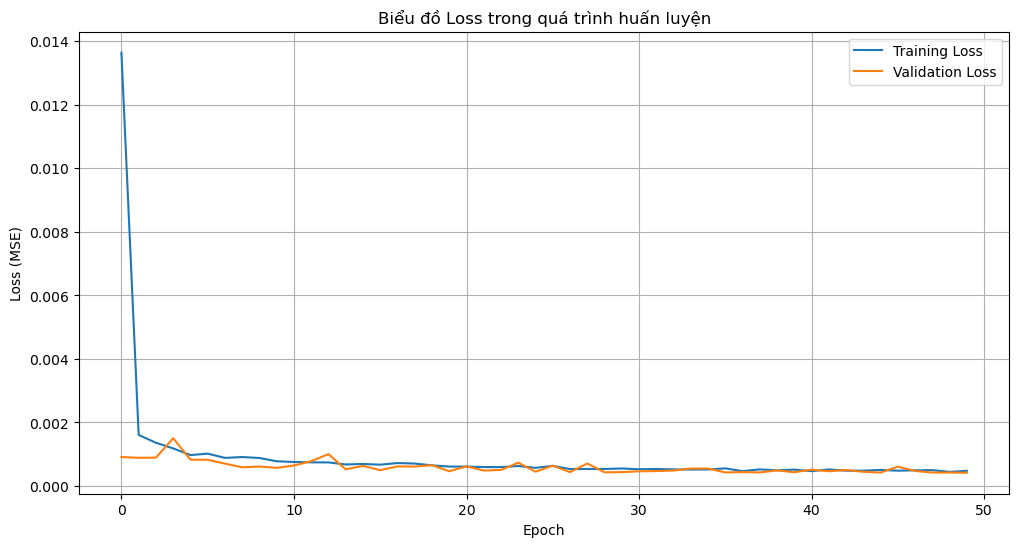

In [36]:
# ======== 7. Vẽ biểu đồ Loss ========
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Biểu đồ Loss trong quá trình huấn luyện')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

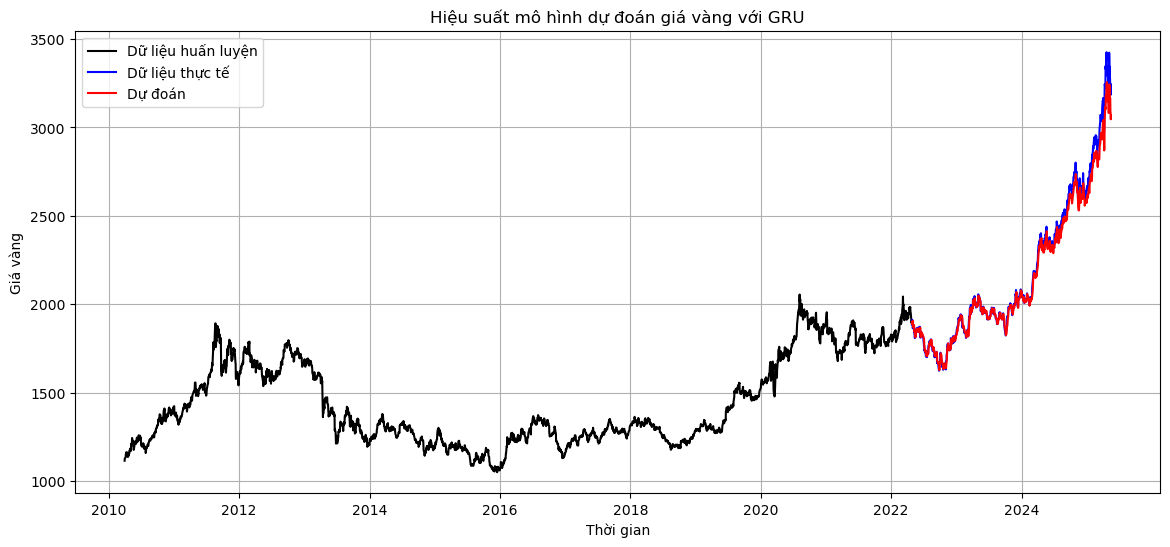

In [37]:
# ======== 8. Vẽ biểu đồ dự đoán ========
plt.figure(figsize=(14, 6))
plt.plot(train_dates, train_inv, label='Dữ liệu huấn luyện', color='black')
plt.plot(test_dates, y_test_inv, label='Dữ liệu thực tế', color='blue')
plt.plot(test_dates, y_pred_inv, label='Dự đoán', color='red')
plt.title('Hiệu suất mô hình dự đoán giá vàng với GRU')
plt.xlabel('Thời gian')
plt.ylabel('Giá vàng')
plt.legend()
plt.grid()

years = pd.to_datetime([f'{y}-01-01' for y in range(2010, 2026, 2)])
plt.xticks(ticks=years, labels=[str(y.year) for y in years])
plt.show()